In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd

import constants as cnst
from classes import SuperCycle
from helpers import cycles_to_dataframe, supercycles_scenario_to_dataframe

# Cycles modelling

In [2]:
df_sps_cycles = cycles_to_dataframe(cnst.SPS_CYCLES)
df_ps_cycles = cycles_to_dataframe(cnst.PS_CYCLES)
df_psb_cycles = cycles_to_dataframe(cnst.PSB_CYCLES)

In [3]:
df_sps_cycles

,Length [s],BPs,Power (MB+MQ) [MW]
AWAKE,7.2,6.0,31.19
HiRadMat,24.0,20.0,17.52
SFTPRO,10.8,9.0,52.83
LHC filling,24.0,20.0,18.03
LHC pilot,13.2,11.0,32.50
MD dedicated,24.0,20.0,18.03
MD parallel,7.2,6.0,2.81
Scrubbing,24.0,20.0,18.03
Zero,1.2,1.0,1.20
deGauss,3.6,3.0,4.77


# Supercycles modelling

In [4]:
# Example of physics supercycle in the SPS
SPS_physics_supercycle = SuperCycle('SPS', 'Physics', [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']])
print('Average power [MW]: %1.2f'%SPS_physics_supercycle.average_power)
print('Supercycle length [s]: %1.1f'%SPS_physics_supercycle.length)
print('Supercycle BPs: %i'%SPS_physics_supercycle.bps)

Average power [MW]: 40.82
Supercycle length [s]: 14.4
Supercycle BPs: 12


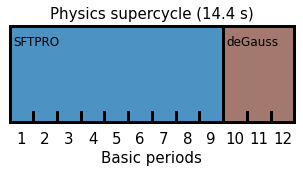

In [5]:
SPS_physics_supercycle.plot_supercycle()

In [6]:
# Allocates some hours/year to the supercycle
# Machine availability is assumed to be 80%
SPS_physics_supercycle.allocate_hours(cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only']['Physics'], machine_availability=0.8)
print('Allocated hours to supercycle: %1.1f'%SPS_physics_supercycle.allocated_hours)
print('Number of times the supercycle is played in the allocated time: %i'%SPS_physics_supercycle.number_of_supercycles_played)

Allocated hours to supercycle: 1399.2
Number of times the supercycle is played in the allocated time: 349800


In [ ]:
# Calculates free BPs for the injectors (i.e. here PS)
SPS_physics_supercycle.calculate_free_bps()
print('Free BPs per supercycle: %i'%SPS_physics_supercycle.free_bps_per_supercycle)
print('Total free BPs in the allocated time: %i'%SPS_physics_supercycle.free_bps_total)

# Typical SPS supercycle scenario

In [ ]:
SPS_supercycles_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
}

In [ ]:
df_sps_supercycles_scenario = supercycles_scenario_to_dataframe(SPS_supercycles_scenario)
df_sps_supercycles_scenario

In [ ]:
for sps_supercycle in list(SPS_supercycles_scenario.values())[0:5]:
    sps_supercycle.plot_supercycle()
    sps_supercycle.calculate_free_bps()
    print('Free BPs per supercycle: %i'%sps_supercycle.free_bps_per_supercycle)

In [ ]:
PS_bps_total = 0
PS_free_bps_total = 0
for sps_supercycle in SPS_supercycles_scenario.values():
    
    sps_supercycle.allocate_hours(cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only'][sps_supercycle.name], machine_availability=0.8)
    sps_supercycle.calculate_free_bps()

    print('*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*')
    print(sps_supercycle.name)
    print('Supercycle BPs: %i'%sps_supercycle.bps)
    print('Free BPs per supercycle: %i'%sps_supercycle.free_bps_per_supercycle)
    print('Allocated hours to supercycle: %1.1f'%sps_supercycle.allocated_hours)
    print('Number of times the supercycle is played in the allocated time: %i'%sps_supercycle.number_of_supercycles_played)
    print('Total free BPs in the allocated time: %i'%sps_supercycle.free_bps_total)

    PS_bps_total += sps_supercycle.allocated_bps
    PS_free_bps_total += sps_supercycle.free_bps_total

In [ ]:
print('Total BPs in the PS: %i'%PS_bps_total)
print('Total free BPs in the PS: %i'%PS_free_bps_total)
percentage_of_free_BPs = PS_free_bps_total/PS_bps_total*100
print('Percentage of free BPs in the PS: %1.2f'%percentage_of_free_BPs)